<img align="right" src="images/tf-small.png" width="90"/>
<img align="right" src="images/etcbc.png" width="100"/>

# MiMi
## A Deterministic Coreference Resolver for Biblical Hebrew

MiMi is a deterministic - meaning 'rule driven' - coreference resolver for Biblical Hebrew. MiMi is the concatenation of Mi Mi in Biblical Hebrew, which means 'Who? Who?' MiMi is used as a tool to identify and analyse participants or entities in a text. MiMi has been built with the aid of the insights that have been gained in the [annotation](https://github.com/cmerwich/participant-analysis/tree/master/annotation) and [iaa](https://github.com/cmerwich/participant-analysis/tree/master/iaa) processes. 

MiMi has two phases: mention detection and coreference resolution. The aim was to build a near perfect mention detection phase and a modular coreference resolver that can be enhanced in future research. Most coreference resolvers, machine learning models or deterministic models, remove singletons in an additional third stage. We have chosen to retain singletons, since they are also of importance for participant analysis in Biblical Hebrew. MiMi can be used for any Hebrew Bible book, regardless the genre. 

#### Phase One: Mention Detection
In the first phase the input text is tokenised and parsed for mentions. The API of [Text-Fabric](https://annotation.github.io/text-fabric/) is used to process the data of the BHSA [Hebrew Bible Database](https://etcbc.github.io/bhsa/) which contains the text of the Hebrew Bible augmented with linguistic annotations as compiled by the Eep Talstra Centre for Bible and Computer [ETCBC](http://etcbc.nl). The mention parser takes as input [phrase atoms](https://etcbc.github.io/bhsa/features/otype/), for which the ETCBC has already determined the boundaries. That makes the parsing of mentions much easier. For both the mention enrichment and the coreference resolution phase many BHSA features are used. The documentation can be found under the aforementioned phrase atom hyperlink. The mention parsing is done with a Python implemention of the lex and yac tools called [SLY](https://sly.readthedocs.io/en/latest/index.html). 

#### Phase Two: Coreference Resolution
In the second phase the mentions are stored as a coreference list of singleton sets. The coreference singleton sets are merged in a sequence of five sieves. MiMi resolves in order: predicates, pronouns, vocatives, appositions and fronted elements. MiMi resolves easy first, meaning that the most easy resolution choices are made first based on explicit information that is already available in the database. 
1. Predicates: MiMi's first sieve searches for explicit subject predicate relations. This is done with so-called mother - daughter clause and clause atom relations that the ETCBC has analysed. 
2. Pronouns: 1st and 2nd person mentions (verbs and pronouns) are resolved within the same paragraph, or domain. In the BHSA data one of the criteria for the determination of a domain is that the same subject is active. In that way it is possible to resolve 1st and 2nd person mentions relatively easy. 3rd person references are much harder and hence need more heuristic rules which are time consuming to program. 3rd person are therefore left out of consideration. 
3. Vocatives: vocative relations are characterised by 2nd person mentions. These are merged with the 2nd person predicate coreference classes. 
4. Appositions: apposition relations are code in the BHSA data. They are therefore easy to resolve.
5. Fronted elements: are also coded, but this data is most incomplete. The sieve is however added for two reasons. It does resolve some extra relations and the ETCBC aims at enriching this fronted element data in the near future. 

#### Statistics 
For both the mention detection phase and the coreference resolution phase performance statistics are generated for the Psalms
* Mention detection statistics: give a view on what the success and failure of the mention parser is. The success for the Psalms is 99.7% which is just slightly higher than the average of 99.5% for the entire HB. 
* Coreference resolution statistics: give a view on how many coreference singleton sets have been resolved. MiMi resolves about 35.4% of the sets for the Psalms. This is considerately higher than the 29.6% average for the entire HB. Important to note is that the unresolved sets contain both truly unresolved sets and singletons. The resolution percentage may thus in fact be higher. 
* Sieve statistics: give a view on how many singleton sets are resolved per sieve. For the Psalms the total is 6539. 

#### Files [Add further description]
1. Mention Detection: For each cluster of chapters that is fed to MiMi a plain text `.out` file is generated in the same directory as in which the coreference command is given. The files are called `mention_errors_BIBLEBOOKNAME_CHAPTERRANGE`. `BIBLEBOOKNAME` and `CHAPTERRANGE` indicate the Bible book that is analysed and the range of chapters that is being studied e.g.: `mention_errors_Psalms_001_050`. The `.out` file contains useful information about which phrase atoms could not be parsed by SLY's parser. The token is given, the text of the token, the start index of the word and word node. 
2. `parser.out`
3. `Psalms_001.ann`, `Psalms_001.tsv`, `Psalms_001.txt`

In [1]:
__author__ = 'erwich/sikkel'

In [2]:
import os
from collections import defaultdict, Counter
from operator import attrgetter
from pprint import pprint
from utils import ExportToLatex
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
from mimi import mimi

To increase the rate,see https://annotation.github.io/text-fabric/Api/Repo/
To increase the rate,see https://annotation.github.io/text-fabric/Api/Repo/
To increase the rate,see https://annotation.github.io/text-fabric/Api/Repo/
To increase the rate,see https://annotation.github.io/text-fabric/Api/Repo/


   |     0.00s No structure info in otext, the structure part of the T-API cannot be used


Parser debugging for MyParser written to parser.out


In [4]:
from parse_ann import *

In [15]:
OUTPUT_LOC = os.path.expanduser('~/Documents/PhD/1-dissertation/DISSERTATIONlatex/Tables/')

In [5]:
mention_stats_df, coref_stats_df, sieve_stats_df, \
                        coref_total_df, sieve_total_df = mimi('Psalms', 1, 150)


 Mention Parse Statistics Psalms: 
 18599 phrase atoms INPUT 
 18552 phrase atoms SUCCESFULLY parsed 
 +27 extra mentions SUCCESFULLY parsed from phrase atoms 
 -98 phrase atoms without mentions 
 47 phrase atom parse ERRORS 
 +0 extra mentions SUCCESFULLY parsed from phrase atom errors 
 -44 phrase atoms without mentions from phrase atom ERRORS 
 18484 mention coreference input 
 99.7% parsing succes 
 0.3% parsing error

 Coreference Resolution Statistics Psalms: 
 18484 total input corefs 
 6539 corefs RESOLVED 
 11945 corefs UNRESOLVED 
 35.4% corefs RESOLVED 
 64.6% corefs UNRESOLVED 
 2252 classes

 Sieve Statistics Psalms: 
 Predicate Sieve: 3138 
 Pronoun Sieve: 2756 
 Vocative Sieve: 535 
 Apposition Sieve: 90 
 Fronted Element Sieve: 20 
 Total Sieves: 6539 
 Total Classes: 2252


In [6]:
mention_stats_df

,book,phrase atoms,pa parsed,+m,-pa,pa errors,+m errors,-pa errors,mentions,%parsed,%error
0,Psalms,18599,18552,27,98,47,0,44,18484,99.7,0.3


In [ ]:
ExportToLatex(OUTPUT_LOC, 'mention_stats_ps', mention_stats_df, indx = False)

In [7]:
coref_total_df

,book,input corefs,resolved,unresolved,%resolved,%unresolved,classes
0,Psalms,18484,6539,11945,35.4,64.6,2252


In [16]:
ExportToLatex(OUTPUT_LOC, 'coref_stats_ps', coref_total_df, indx = False)

In [8]:
my_book_name = 'Psalms'
from_chapter = 1
to_chapter = 150

mentions, corefs, suffix_errors = TexFabricParse(my_book_name, from_chapter, to_chapter)

def GetLengthSingletons(c, k):
    if c.id == 'Singletons':
        total_sing = len(c.terms)
        return total_sing

def MakeCorrectedDataFrame(corefs, coref_total_df):
    corrected_list = []
    
    total_sing_ann = GetLengthSingletons(corefs[0], '0')
    input_corefs = coref_total_df.iloc[0]['input corefs']
    resolved = coref_total_df.iloc[0]['resolved']
    unresolved_mimi = coref_total_df.iloc[0]['unresolved']
    probably_unresolved = unresolved_mimi - total_sing_ann
    #coref_success_percent = round((1 - (probably_unresolved / input_corefs)) * 100, 1)
    coref_success = round((resolved / input_corefs) * 100, 1)
    singleton_percent = round((total_sing_ann / input_corefs) * 100, 1)
    coref_unresolved_percent = round((probably_unresolved / input_corefs) * 100, 1)
    
    corrected_list.append({'book' : coref_total_df.iloc[0]['book'],
                            'input corefs' : input_corefs,
                            'resolved' : resolved,
                            'singletons.ann' : total_sing_ann, 
                            'unresolved' : probably_unresolved,
                            '%resolved' : coref_success,
                            '%singletons.ann' : singleton_percent,
                            '%unresolved' : coref_unresolved_percent
                            })
    
    coref_corr_stats_df = pd.DataFrame(corrected_list)
    coref_corr_stats_df = coref_corr_stats_df[['book', 'input corefs', 'resolved', 'singletons.ann', 
                                               'unresolved', '%resolved', '%singletons.ann', '%unresolved']]
    
    print('\n',
        f'Total singletons from annotations: {total_sing_ann}\n',
        f'MiMi unresolved coref sets: {unresolved_mimi}\n',
        f'MiMi truly unresolved: {probably_unresolved}'
          )
    
    #ExportToLatex(OUTPUT_LOC, 'coref_corr_stats_ps', coref_corr_stats_df, indx = False)
    
    return coref_corr_stats_df

MakeCorrectedDataFrame(corefs, coref_total_df)


 Total singletons from annotations: 4788
 MiMi unresolved coref sets: 11945
 MiMi truly unresolved: 7157


,book,input corefs,resolved,singletons.ann,unresolved,%resolved,%singletons.ann,%unresolved
0,Psalms,18484,6539,4788,7157,35.4,25.9,38.7


In [17]:
sieve_total_df

,book,predicate sieve,pronoun sieve,vocative sieve,apposition sieve,fronted element sieve,total sieves,total classes
0,Psalms,3138,2756,535,90,20,6539,2252


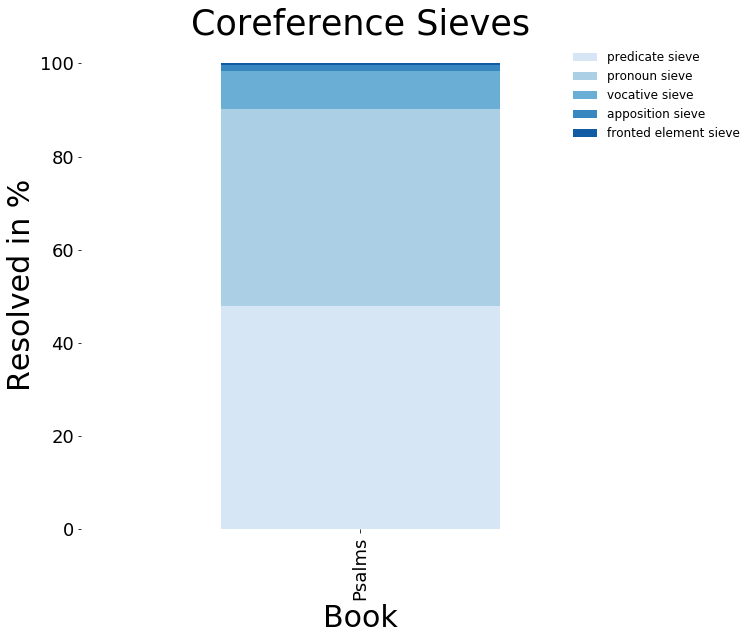

In [18]:
#sns.choose_colorbrewer_palette('sequential')
sieves = ('predicate sieve', 'pronoun sieve', 'vocative sieve',
          'apposition sieve', 'fronted element sieve')
colours = sns.color_palette("Blues", n_colors=len(sieves))

df_total = sieve_total_df['total sieves']

df = sieve_total_df.drop(['total sieves', 'total classes'], axis=1)
df = df.set_index('book')

res = df.div(df.sum(axis=1), axis=0)*100
res = res.reset_index()
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
res.plot(kind='bar', x='book', stacked=True, figsize=(10,9), color=colours)
plt.title(('Coreference Sieves'), fontsize=35)
plt.xlabel('Book', fontsize=30)
plt.ylabel('Resolved in %', fontsize=30)
plt.box(False)
plt.legend(frameon=False, fontsize=12, loc='best', bbox_to_anchor=(.7, .5, 0.5, 0.5))
plt.show()

In [12]:
res

,book,predicate sieve,pronoun sieve,vocative sieve,apposition sieve,fronted element sieve
0,Psalms,47.988989,42.147117,8.181679,1.376357,0.305857


In [19]:
ExportToLatex(OUTPUT_LOC, 'sieve_stats_ps', sieve_total_df, indx = False)

In [20]:
coref_stats_df

,chapter,input corefs,resolved,unresolved,%resolved,%unresolved,classes
0,Psalms_001,43,10,33,23.3,76.7,8
1,Psalms_002,87,26,61,29.9,70.1,14
2,Psalms_003,66,29,37,43.9,56.1,8
3,Psalms_004,75,28,47,37.3,62.7,10
4,Psalms_005,112,49,63,43.8,56.2,11
5,Psalms_006,84,45,39,53.6,46.4,14
6,Psalms_007,142,53,89,37.3,62.7,12
7,Psalms_008,62,15,47,24.2,75.8,3
8,Psalms_009,160,53,107,33.1,66.9,29
9,Psalms_010,150,46,104,30.7,69.3,17


In [21]:
ExportToLatex(OUTPUT_LOC, 'coref_stats_ps_all', coref_stats_df, indx = False)

In [22]:
sieve_stats_df

,chapter,predicate sieve,pronoun sieve,vocative sieve,apposition sieve,fronted element sieve,total sieves,classes
0,Psalms_001,10,0,0,0,0,10,8
1,Psalms_002,16,7,2,1,0,26,14
2,Psalms_003,10,14,5,0,0,29,8
3,Psalms_004,17,7,4,0,0,28,10
4,Psalms_005,17,24,8,0,0,49,11
5,Psalms_006,17,23,5,0,0,45,14
6,Psalms_007,26,19,8,0,0,53,12
7,Psalms_008,2,7,5,1,0,15,3
8,Psalms_009,36,14,3,0,0,53,29
9,Psalms_010,37,5,4,0,0,46,17


In [23]:
ExportToLatex(OUTPUT_LOC, 'sieve_stats_ps_all', sieve_stats_df, indx = False)